In [ ]:
import torch
import torch.nn as nn

torch.manual_seed(42)

In [ ]:
import torch.nn.functional as F
import numpy as np
import torch.optim as optim

https://arxiv.org/abs/1301.3781

## word2vec paper link

The goal of the paper was to achieve high quality distributed vector representations that capture a large number of precise syntactic and semantic relationships..



In [ ]:
corpus = [
    "the cat sat on the mat",
    "the dog barked at the cat",
    "the bird sang a song",
    "the fish swam in the pond",
    "the sun rises in the east",
    "the moon shines at night",
    "a quick brown fox jumps over the lazy dog",
    "she sells seashells by the seashore",
]

In [ ]:
some_string = " ".join(corpus)
vocabulary = set(some_string.split(' '))
vocabulary

{'a',
 'at',
 'barked',
 'bird',
 'brown',
 'by',
 'cat',
 'dog',
 'east',
 'fish',
 'fox',
 'in',
 'jumps',
 'lazy',
 'mat',
 'moon',
 'night',
 'on',
 'over',
 'pond',
 'quick',
 'rises',
 'sang',
 'sat',
 'seashells',
 'seashore',
 'sells',
 'she',
 'shines',
 'song',
 'sun',
 'swam',
 'the'}

In [ ]:
window_size = 2
# training set  -> (centre_word,target_word)

my_dataset = []
for line in corpus:
  text = line.split(' ')
  for i in range(len(text)):
    for j in range(window_size):
      if i-window_size+j >= 0:
        my_dataset.append([text[i],text[i-window_size+j]])
    # we will reach just one place before the centre word,need to move two steps forward
    for k in range(window_size):
      if i+k+1 < len(text):
        my_dataset.append([text[i],text[i+k+1]])

In [ ]:
len(my_dataset)

148

In [ ]:
my_dataset

[['the', 'cat'],
 ['the', 'sat'],
 ['cat', 'the'],
 ['cat', 'sat'],
 ['cat', 'on'],
 ['sat', 'the'],
 ['sat', 'cat'],
 ['sat', 'on'],
 ['sat', 'the'],
 ['on', 'cat'],
 ['on', 'sat'],
 ['on', 'the'],
 ['on', 'mat'],
 ['the', 'sat'],
 ['the', 'on'],
 ['the', 'mat'],
 ['mat', 'on'],
 ['mat', 'the'],
 ['the', 'dog'],
 ['the', 'barked'],
 ['dog', 'the'],
 ['dog', 'barked'],
 ['dog', 'at'],
 ['barked', 'the'],
 ['barked', 'dog'],
 ['barked', 'at'],
 ['barked', 'the'],
 ['at', 'dog'],
 ['at', 'barked'],
 ['at', 'the'],
 ['at', 'cat'],
 ['the', 'barked'],
 ['the', 'at'],
 ['the', 'cat'],
 ['cat', 'at'],
 ['cat', 'the'],
 ['the', 'bird'],
 ['the', 'sang'],
 ['bird', 'the'],
 ['bird', 'sang'],
 ['bird', 'a'],
 ['sang', 'the'],
 ['sang', 'bird'],
 ['sang', 'a'],
 ['sang', 'song'],
 ['a', 'bird'],
 ['a', 'sang'],
 ['a', 'song'],
 ['song', 'sang'],
 ['song', 'a'],
 ['the', 'fish'],
 ['the', 'swam'],
 ['fish', 'the'],
 ['fish', 'swam'],
 ['fish', 'in'],
 ['swam', 'the'],
 ['swam', 'fish'],
 ['swam',

In [ ]:
word_to_idx = {word:idx for idx,word in enumerate(vocabulary)}
idx_to_word = {idx:w for w,idx in word_to_idx.items()}


In [ ]:
embed = torch.randn(4,3)
embed

tensor([[ 0.2471, -0.4658,  0.7723],
        [ 0.0452,  0.8574, -1.4250],
        [-1.3370, -1.9376,  0.5853],
        [ 0.7991, -0.7777,  0.7274]])

In [ ]:
embed[[0,2,3]]

tensor([[ 0.2471, -0.4658,  0.7723],
        [-1.3370, -1.9376,  0.5853],
        [ 0.7991, -0.7777,  0.7274]])

loading the data

In [ ]:
my_dataset

In [ ]:
for sample in my_dataset:
  sample[0] = word_to_idx[sample[0]]
  sample[1] = word_to_idx[sample[1]]

In [ ]:
my_dataset

[[27, 26],
 [27, 8],
 [26, 27],
 [26, 8],
 [26, 19],
 [8, 27],
 [8, 26],
 [8, 19],
 [8, 27],
 [19, 26],
 [19, 8],
 [19, 27],
 [19, 4],
 [27, 8],
 [27, 19],
 [27, 4],
 [4, 19],
 [4, 27],
 [27, 24],
 [27, 6],
 [24, 27],
 [24, 6],
 [24, 23],
 [6, 27],
 [6, 24],
 [6, 23],
 [6, 27],
 [23, 24],
 [23, 6],
 [23, 27],
 [23, 26],
 [27, 6],
 [27, 23],
 [27, 26],
 [26, 23],
 [26, 27],
 [27, 7],
 [27, 25],
 [7, 27],
 [7, 25],
 [7, 11],
 [25, 27],
 [25, 7],
 [25, 11],
 [25, 5],
 [11, 7],
 [11, 25],
 [11, 5],
 [5, 25],
 [5, 11],
 [27, 0],
 [27, 31],
 [0, 27],
 [0, 31],
 [0, 32],
 [31, 27],
 [31, 0],
 [31, 32],
 [31, 27],
 [32, 0],
 [32, 31],
 [32, 27],
 [32, 13],
 [27, 31],
 [27, 32],
 [27, 13],
 [13, 32],
 [13, 27],
 [27, 28],
 [27, 21],
 [28, 27],
 [28, 21],
 [28, 32],
 [21, 27],
 [21, 28],
 [21, 32],
 [21, 27],
 [32, 28],
 [32, 21],
 [32, 27],
 [32, 18],
 [27, 21],
 [27, 32],
 [27, 18],
 [18, 32],
 [18, 27],
 [27, 2],
 [27, 1],
 [2, 27],
 [2, 1],
 [2, 23],
 [1, 27],
 [1, 2],
 [1, 23],
 [1, 10],
 [

In [ ]:
import torch

In [ ]:
dataset_idx_tensor = torch.tensor(my_dataset,dtype = torch.long)
dataset_idx_tensor

tensor([[27, 26],
        [27,  8],
        [26, 27],
        [26,  8],
        [26, 19],
        [ 8, 27],
        [ 8, 26],
        [ 8, 19],
        [ 8, 27],
        [19, 26],
        [19,  8],
        [19, 27],
        [19,  4],
        [27,  8],
        [27, 19],
        [27,  4],
        [ 4, 19],
        [ 4, 27],
        [27, 24],
        [27,  6],
        [24, 27],
        [24,  6],
        [24, 23],
        [ 6, 27],
        [ 6, 24],
        [ 6, 23],
        [ 6, 27],
        [23, 24],
        [23,  6],
        [23, 27],
        [23, 26],
        [27,  6],
        [27, 23],
        [27, 26],
        [26, 23],
        [26, 27],
        [27,  7],
        [27, 25],
        [ 7, 27],
        [ 7, 25],
        [ 7, 11],
        [25, 27],
        [25,  7],
        [25, 11],
        [25,  5],
        [11,  7],
        [11, 25],
        [11,  5],
        [ 5, 25],
        [ 5, 11],
        [27,  0],
        [27, 31],
        [ 0, 27],
        [ 0, 31],
        [ 0, 32],
        [3

In [ ]:
dataset_idx_tensor[:6]

tensor([[21, 26],
        [21, 10],
        [26, 21],
        [26, 10],
        [26,  8],
        [10, 21]])

In [ ]:
from torch.utils.data import DataLoader

dataset_idx_tensor[:4], it does not create a new copy of the data. Instead, it returns a view of the original tensor. This view shares the same underlying data storage as the original tensor, which makes indexing and slicing operations memory-efficient.

In [ ]:
dataloader = DataLoader(dataset_idx_tensor,batch_size=4,shuffle = True)

In [ ]:
class my_skip_gram(nn.Module):


  def __init__(self,vocab_size:int,dim:int):
    super().__init__()
    self.U = nn.Embedding(vocab_size,dim)
    self.V = nn.Embedding(vocab_size,dim)

# ek hi embedding use krte hain...

  def forward(self,centre_indices):
    # # dot product, U dot V
    similarity_matrix = torch.matmul(self.U.weight[centre_indices],(self.V.weight.t()))
    # # shape -> vocab_size X  vocab_size

    loss_fn = nn.LogSoftmax(dim = 1)
    log_probabs = loss_fn(similarity_matrix)
    self.pred_probabs = torch.exp(log_probabs)
    return log_probabs


In [ ]:
len(vocabulary)

33

In [ ]:
vocab_size = len(vocabulary)
dim = 2

model = my_skip_gram(vocab_size,dim)

In [ ]:
epochs = 1000
batch_size = 4
model_params = model.parameters()
criterion = nn.NLLLoss()
optimiser = optim.Adam(model_params,lr = 0.1)
# SGD(model_params,lr = 0.1,momentum = )

dataloader = DataLoader(dataset_idx_tensor,batch_size,shuffle = True)

def accuracy_epochs(num_correct_preds,num_training_data):
    # need to convert it into float datatype from tensor

    return float(num_correct_preds)/float(num_training_data)

for epoch in range(epochs):

  loss_per_epoch = 0
  num_correct = 0
  num_train_data = 0
  for train_data in dataloader:
    centre = train_data[:,0]
    target = train_data[:,1]

    model.zero_grad()
    loss_ = model(centre)

    loss_per_batch = criterion(loss_,target)

    loss_per_batch.backward()
    optimiser.step()

    # accuracy calculation
    with torch.no_grad():
      pred_mat = model.pred_probabs
      num_correct += sum(target == pred_mat.argmax(dim = 1)).item()


    num_train_data += batch_size

  acc_calc = accuracy_epochs(num_correct,num_train_data)

  loss_per_epoch += loss_per_batch.item()

  print(f"epoch:{epoch},loss:{loss_per_epoch:.2f},accuracy:{acc_calc:.3f}")


epoch:0,loss:3.38,accuracy:0.034
epoch:1,loss:3.20,accuracy:0.128
epoch:2,loss:3.94,accuracy:0.169
epoch:3,loss:2.67,accuracy:0.162
epoch:4,loss:2.97,accuracy:0.182
epoch:5,loss:3.54,accuracy:0.209
epoch:6,loss:2.58,accuracy:0.182
epoch:7,loss:2.80,accuracy:0.216
epoch:8,loss:3.17,accuracy:0.162
epoch:9,loss:4.09,accuracy:0.182
epoch:10,loss:3.93,accuracy:0.162
epoch:11,loss:4.13,accuracy:0.182
epoch:12,loss:3.12,accuracy:0.169
epoch:13,loss:3.29,accuracy:0.162
epoch:14,loss:3.04,accuracy:0.176
epoch:15,loss:1.80,accuracy:0.203
epoch:16,loss:1.77,accuracy:0.149
epoch:17,loss:3.45,accuracy:0.162
epoch:18,loss:3.43,accuracy:0.182
epoch:19,loss:3.92,accuracy:0.135
epoch:20,loss:3.45,accuracy:0.149
epoch:21,loss:2.78,accuracy:0.149
epoch:22,loss:3.04,accuracy:0.149
epoch:23,loss:2.85,accuracy:0.176
epoch:24,loss:2.93,accuracy:0.162
epoch:25,loss:2.94,accuracy:0.196
epoch:26,loss:4.68,accuracy:0.196
epoch:27,loss:2.87,accuracy:0.142
epoch:28,loss:2.69,accuracy:0.189
epoch:29,loss:2.71,accur

In [ ]:
model.U.weight[word_to_idx['dog']]

tensor([ 1.9080, -0.6924], grad_fn=<SelectBackward0>)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
corpus

['the cat sat on the mat',
 'the dog barked at the cat',
 'the bird sang a song',
 'the fish swam in the pond',
 'the sun rises in the east',
 'the moon shines at night',
 'a quick brown fox jumps over the lazy dog',
 'she sells seashells by the seashore']

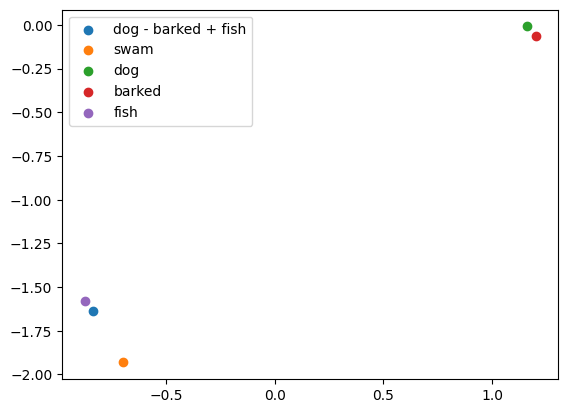

In [ ]:
dog_vec = (model.U.weight[word_to_idx['dog']].detach().numpy()+model.V.weight[word_to_idx['dog']].detach().numpy())/2

barked_vec = (model.U.weight[word_to_idx['barked']].detach().numpy()+model.V.weight[word_to_idx['barked']].detach().numpy())/2

fish_vec = (model.U.weight[word_to_idx['fish']].detach().numpy()+model.V.weight[word_to_idx['fish']].detach().numpy())/2

swam_vec = (model.U.weight[word_to_idx['swam']].detach().numpy()+model.V.weight[word_to_idx['swam']].detach().numpy())/2


check_vec = barked_vec - dog_vec+fish_vec

plt.scatter(check_vec[0],check_vec[1],label = "dog - barked + fish")
plt.scatter(swam_vec[0],swam_vec[1],label = "swam")
plt.scatter(dog_vec[0],dog_vec[1],label = "dog")
plt.scatter(barked_vec[0],barked_vec[1],label = "barked")
plt.scatter(fish_vec[0],fish_vec[1],label = "fish")

plt.legend()
plt.show()

sun rises , moon shines

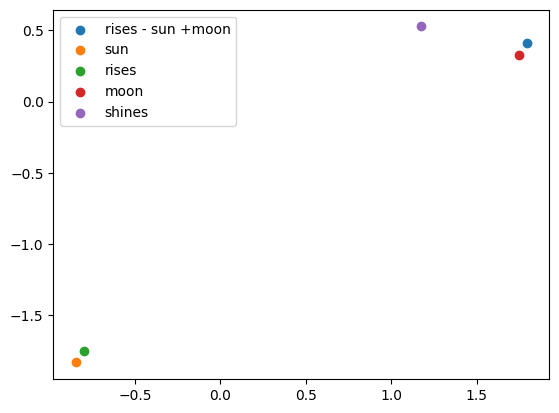

In [ ]:
sun_vec = (model.U.weight[word_to_idx['sun']].detach().numpy()+model.V.weight[word_to_idx['sun']].detach().numpy())/2

rises_vec = (model.U.weight[word_to_idx['rises']].detach().numpy()+model.V.weight[word_to_idx['rises']].detach().numpy())/2

moon_vec = (model.U.weight[word_to_idx['moon']].detach().numpy()+model.V.weight[word_to_idx['moon']].detach().numpy())/2

shines_vec = (model.U.weight[word_to_idx['shines']].detach().numpy()+model.V.weight[word_to_idx['shines']].detach().numpy())/2

analogy_test = rises_vec - sun_vec + moon_vec

plt.scatter(analogy_test[0],analogy_test[1],label = "rises - sun +moon")
plt.scatter(sun_vec[0],sun_vec[1],label = "sun")
plt.scatter(rises_vec[0],rises_vec[1],label = "rises")
plt.scatter(moon_vec[0],moon_vec[1],label = "moon")
plt.scatter(shines_vec[0],shines_vec[1],label = "shines")

plt.legend()
plt.show()

### little bit better than last time ->

problem -> less data and only 2 dimension of word vectors , high dimension will capture easily and more data will capture even subtle relationships, but for capturing that complex relationships , we need to select proper data for that..